This notebook is a simple introduction to pytorch, assuming you already know  python, numpy and the notebooks. PyTorch is a python module dedicated to deep-learning. Everything is based on a specific data structure: the tensor. 

Machine learning basically relies on three components: 
- the model: in this course this is a Neural Network and in pytorch a **module**
- the model is trained to minimize a **loss** function
- this minization can be achieved with gradient descent (or one of its variant) with an **optimizer**. 
In this notbook we will introduce these 3 components and also the basic data structure (the tensors). 


To start with pytorch, here are some external websites: 
- http://pytorch.org/tutorials/ : official tutorials
- http://pytorch.org/docs/master/ : official documentation

Before, check the version of pytorch

In [1]:
import torch as th
print(th.__version__)
import matplotlib.pyplot as plt
import torch.nn as nn

1.12.1


You should have a version of at least 1.0.0. 

# Tensor: overview 

Tensors are the PyTorch very similar to `numpy` arrays, with the additional features like  GPU acceleration. The name **tensor** is a generalization of familiar concepts: a vector is a 1-D tensor, and a matrix a 2-D tensor. When working with neural networks, we will use tensors of various shapes and number of dimensions.

Most common functions you know from numpy can be used on tensors as well. Actually, since numpy arrays are so similar to tensors, we can convert most tensors to numpy arrays (and back) 

## Initialization

How to create tensors ? There are many ways. 

In [2]:
x = th.Tensor(2, 3, 4)
print(x)
print(x.dtype)

x = th.IntTensor(2, 3, 4)
print(x)
print(x.dtype)



tensor([[[1.3956e+19, 4.2295e-41, 1.2109e-12, 0.0000e+00],
         [2.9907e+21, 6.7421e+22, 1.6930e+22, 1.1704e-19],
         [1.3563e-19, 1.8371e+25, 6.1949e-04, 4.4850e+21]],

        [[1.0396e+21, 2.3078e-12, 1.3563e-19, 2.1701e-18],
         [1.0995e+27, 1.7542e+19, 1.5766e-19, 1.8513e+28],
         [7.5511e+31, 7.8229e-33, 1.3563e-19, 1.1704e-19]]])
torch.float32
tensor([[[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 1, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [8, 0, 1, 0]]], dtype=torch.int32)
torch.int32


Can you explain the result ? 

There more convenient way to do, try the following methods and look at their results: 
- th.zeros
- th.ones
- th.rand
- th.randn
- th.arange




In [20]:
# If you want help 
?th.zeros

## Acces and shape
Play with the following code cells


In [3]:
n = 10
X = th.rand(n, 2) * 3 - 1.5

print(X[:5]) # 10 elements
print(X[0]) # first row
print(X[:,0]) # first column
print(X[0,1]) # element at a given location
# and for the following 
print(X[-1])
print(X[-2:])
print(X[-2:,0])


tensor([[-0.1457,  1.0822],
        [ 0.7131,  0.1484],
        [-0.0577, -0.1517],
        [-0.4860,  0.2315],
        [ 1.1819,  0.2285]])
tensor([-0.1457,  1.0822])
tensor([-0.1457,  0.7131, -0.0577, -0.4860,  1.1819, -0.2242, -0.1426, -0.4541,
        -1.0262,  0.0196])
tensor(1.0822)
tensor([0.0196, 1.3731])
tensor([[-1.0262, -1.1142],
        [ 0.0196,  1.3731]])
tensor([-1.0262,  0.0196])


In [4]:
print(X.size())
print(X.size(1))
print(X.shape)
print(X.shape[1])



torch.Size([10, 2])
2
torch.Size([10, 2])
2


Becareful with modifications:

In [5]:
x1 = th.rand(2, 3)
x2 = x1
print("X1 (before)", x1)
print("X2 (before)", x2)

x2[-1]= 0
print("X1 (after)", x1)
print("X2 (after)", x2)

X1 (before) tensor([[0.4509, 0.6541, 0.2233],
        [0.4338, 0.6322, 0.9535]])
X2 (before) tensor([[0.4509, 0.6541, 0.2233],
        [0.4338, 0.6322, 0.9535]])
X1 (after) tensor([[0.4509, 0.6541, 0.2233],
        [0.0000, 0.0000, 0.0000]])
X2 (after) tensor([[0.4509, 0.6541, 0.2233],
        [0.0000, 0.0000, 0.0000]])


## Operations

Most operations that exist in numpy, also exist in PyTorch. A full list of operations can be found in the PyTorch documentation. The simplest one to add two tensors:


In [6]:
x1 = th.rand(2, 3)
x2 = th.rand(2, 3)
y = x1 + x2

print("X1", x1)
print("X2", x2)
print("Y", y)

X1 tensor([[0.1622, 0.9898, 0.9941],
        [0.2149, 0.9773, 0.6732]])
X2 tensor([[0.2009, 0.4009, 0.3978],
        [0.6389, 0.4770, 0.1494]])
Y tensor([[0.3631, 1.3907, 1.3919],
        [0.8538, 1.4543, 0.8226]])


Calling `x1 + x2` creates a new tensor containing the sum of the two inputs. However, we can also use in-place operations that are applied directly on the memory of a tensor. We therefore change the values of `x2` without the chance to re-accessing the previous values of `x2`. In-place operations are usually marked with a underscore postfix like `add_` instead of `add`.

In [7]:
x1 = th.rand(2, 3)
x2 = th.rand(2, 3)
print("X1 (before)", x1)
print("X2 (before)", x2)

x2.add_(x1)
print("X1 (after)", x1)
print("X2 (after)", x2)

X1 (before) tensor([[0.1752, 0.7047, 0.8418],
        [0.1441, 0.7891, 0.3881]])
X2 (before) tensor([[0.3806, 0.8452, 0.9797],
        [0.9677, 0.8739, 0.6038]])
X1 (after) tensor([[0.1752, 0.7047, 0.8418],
        [0.1441, 0.7891, 0.3881]])
X2 (after) tensor([[0.5559, 1.5499, 1.8215],
        [1.1118, 1.6631, 0.9919]])


## Exercises

* Extract the first row and the last row (do the same with columns)
* Build a matrix  A of dimension (2,3), a matrix  B (2,1) et and  C (1,4) with random initialisation. 
* Concatenate A with B, and add the results with C. 
* Create A (5,4), then B (3,4) which contains in this order: the second, the first and the fourth row of A. 

Look at the following code and how  x2 is built from x. 

In [8]:
x = th.randn(5, 4)
print(x)

x2= th.stack((x,x) , dim=0)
print (x2[0]) 
print (x2.size()) 

x2= th.stack((x,x) , dim=1)
print (x2[0]) 
print (x2.size()) 

x2= th.stack((x,x) , dim=2)
print (x2[0]) 
print (x2.size())


tensor([[-0.3406,  0.8951, -0.1111, -0.5247],
        [-0.9998, -1.8188,  0.3526, -2.1011],
        [-1.3746, -1.1166, -2.0555,  0.7726],
        [ 1.4568,  0.0156, -0.5897, -0.9312],
        [-0.6151,  0.7645, -0.2572, -1.0555]])
tensor([[-0.3406,  0.8951, -0.1111, -0.5247],
        [-0.9998, -1.8188,  0.3526, -2.1011],
        [-1.3746, -1.1166, -2.0555,  0.7726],
        [ 1.4568,  0.0156, -0.5897, -0.9312],
        [-0.6151,  0.7645, -0.2572, -1.0555]])
torch.Size([2, 5, 4])
tensor([[-0.3406,  0.8951, -0.1111, -0.5247],
        [-0.3406,  0.8951, -0.1111, -0.5247]])
torch.Size([5, 2, 4])
tensor([[-0.3406, -0.3406],
        [ 0.8951,  0.8951],
        [-0.1111, -0.1111],
        [-0.5247, -0.5247]])
torch.Size([5, 4, 2])


## Reshape and squeeze

The method **view()** is similar to *reshape*. This is **important** since with neural net, you will often need to play with dimensions. 

* Build a tensor of size (2, 3, 4)
* Convert it in a matrix of dimension (3,8) and (2,12)
* What does  *view(2,-1)*  do ? 

In [21]:
a = th.arange(24).view(2,3,4)
print(a)

b = a.view(-1,4,2)
a[-1] = 0
print(b)
print(a.view(2,12))


tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])
tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5],
         [ 6,  7]],

        [[ 8,  9],
         [10, 11],
         [ 0,  0],
         [ 0,  0]],

        [[ 0,  0],
         [ 0,  0],
         [ 0,  0],
         [ 0,  0]]])
tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])


Assume you have a Tensor A of dimensions (3,2,1) that you initialized as you want:
- look at the documentation of the method **squeeze**
- Try it on A
- And do the reverse with unsqueeze

In [33]:
a = th.randn(4,1,3,1)
print(a.shape)
a.squeeze_()
print(a.shape)
a.unsqueeze(-1).shape

torch.Size([4, 1, 3, 1])
torch.Size([4, 3])


torch.Size([4, 3, 1])

**Warning**: `view` is not  `transpose`

In [34]:
x = th.arange(0,12).view(3,4)
print(x)
x = x.view(4,3)
print(x)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])


Compare with the `transpose` operation

In [35]:
x = th.arange(0,12).view(3,4)
print(x.t())

tensor([[ 0,  4,  8],
        [ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11]])


# Pytorch overview

## Tensor  overview
For users who are familiar with numpy arrays, the PyTorch **Tensor** class is very similar. PyTorch is like NumPy, but with GPU acceleration and automatic computation of gradients. This  makes it suitable for deep learning: calculating backward pass data automatically starting from a forward expression.

The forward pass is implemented as a computation graph. The **Tensor** is the basic piece of this computation graph, to encode the data (input/output) and the parameters of the model. 
A Tensor is both a tensor (like a numpy array or a matlab matrix) and a variable (or a node) of the computation graph. A Tensor can store data and the associated gradients.



**IMPORTANT NOTE: ** Since torch 0.3, a **Tensor** is a **Variable** that wraps a tensor. Before these 2 concepts were separated. 

## Module overview

A module is a part of a NNet. It may contains Tensors. The core PyTorch modules for building neural networks are located in *torch.nn*, which provides common neural network layers and other architectural components. Fully connected layers, convolutional layers, activation functions, and loss functions can all be found here. Modules can be seen as pre-built pieces of computation graph. 

A simple example of *module* is `Linear`: it's a fully connected layer, so a linear transformation of the input. It contains a matrix of parameters (a Tensor). Activation function are also `Module`. You can therefore create a cascade of `Linear` module with a `Sigmoid`, for example. 

A special kind of module is a *container* : a module that contains other module. The most widely used is `Sequential`: it's a container to implement a feed-forward network. When you create a `Sequential` object you pass him an ordered list of modules to create the cascade of operation. 


## Gradient computation and optimization
To learn the model, we need to things: 
- Compute the gradient of the loss with respect to the parameters. The gradients are computed via auto-differentiation. This is the role of the **backward** function.  
- Update the parameters, with these gradient values. This is the role of the **optimizer**. The optimizer is an object that manages the gradient descent updates. 

# Automatic differentiation  (auto-grad)

`torch.autograd` provides classes and functions implementing automatic differentiation. 
When a tensor is created with `requires_grad=True`, the object will be able to store information about the gradient. In the following example, we build a computational graph. The "end" of this graph must be a scalar for automatic differentiation. Look at the following code. 



In [36]:
x = th.randn(1, 1, requires_grad=True)
print("x:",x)
print("x.grad:",x.grad)

x: tensor([[0.6365]], requires_grad=True)
x.grad: None


The Tensor `x` has an attribute `grad`. It is set to None for the moment.
To build a computational graph using `x`, we just need to create new variables using torch operation.  The function `backward` can be called on a Tensor that contains a scalar. It computes the gradient (the partial derivatives) of the this scalar value with respect to all the Tensors involved in the computation. Look at the following code:

In [37]:
y = 2*x+1 
print(y)
y.backward()
print(x.grad)

tensor([[2.2730]], grad_fn=<AddBackward0>)
tensor([[2.]])


Can you explain the result ? 

The computation graph can be of course deeper. For instance, we can introduce a new variable `w`, a tensor as well. 

In [38]:
w = th.randn(1,1, requires_grad=True)
x = th.randn(1, 1, requires_grad=True)

print("w=",w.item()," and x=",x.item())

w= 2.542219638824463  and x= -0.6572421193122864


In [39]:
z = w*x
z.backward()
print(x.grad)
print(w.grad)

tensor([[2.5422]])
tensor([[-0.6572]])


What do you think about the result ? 


It is worth noticing that the gradient is a tensor operation on a scalar value: we compute the partial derivative of a scalar quantity w.r.t a tensor. The variable on which we run the backward must be a single value. 

Let us consider the following code: can you explain the results ? 

In [44]:
x = th.randn(2,2,requires_grad=True)        # x is a square matrix
# print(x)
out = x.pow(2).sum() # out is a new variable (scalar)
out.backward()           # back propagation in the graph
print("g:",x.grad)       # the gradient of out with respect to x 
print("x:",x)            # A simple check. Is it what expected ?  

g: tensor([[-2.7553, -0.8254],
        [-0.7619,  3.0229]])
x: tensor([[-1.3777, -0.4127],
        [-0.3810,  1.5114]], requires_grad=True)


And for this example  ? 

In [ ]:
x = th.randn(2,2,requires_grad=True)        # x is a square matrix
print(x)
w = th.ones(1,2,requires_grad=True)
print(w)
out = 0.5*(w@x).pow(2).sum() # out is a new variable (scalar)
out.backward()           # back propagation in the graph
print("x:",x)            
print("x.grad:",x.grad)  # the gradient of out with respect to x 
print("w:",w)            
print("w.grad:",w.grad)  # the gradient of out with respect to x 

# Machine Learning (or linear regression with gradient descent)

In this section we consider a synthetic problem of regression. The data are generated like this: 

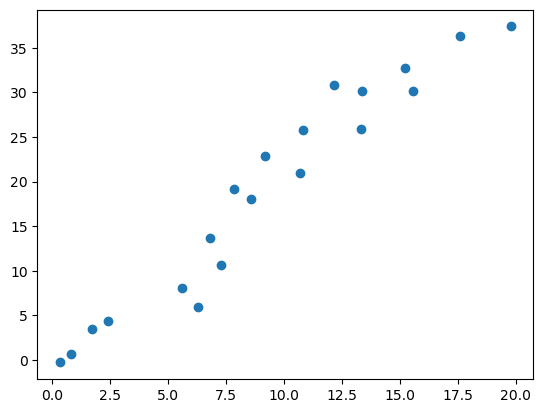

In [45]:
th.manual_seed(123) # to ensure reproducibility
var= 1 # 
Npoints = 20
X = th.arange(Npoints) + th.randn(Npoints)/var
Y = 2*(th.arange(Npoints) + th.randn(Npoints)/var) + 0.5 
# 
_ = plt.scatter(X,Y)

Our goal is to approximate this simple data set with a function $f$ such that 
$$
y_i \approx f(x_i)
$$ 
To find the right set of parameters that defines $f$, we want to minimize the mean square error:
$$ L = \sum_i (f(x_i) - y_i)^2.$$
Our first assumption is that $f$ is a linear function: 
$$ f(x) = wx+w_0.$$

The optimization program (or the gradient descent) starts with the random initialization of  the parameters $(w,w_0)$ 

In [46]:
w = th.randn(1,requires_grad=True)
w0= th.randn(1,requires_grad=True)

If we plot the line and the training points, this is not good (or you are very lucky):

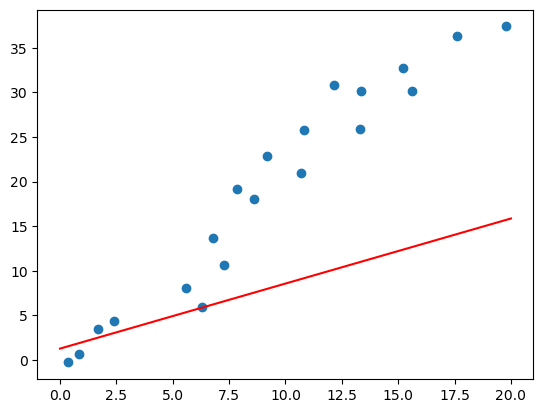

In [47]:
xs = th.linspace(0,Npoints,2) # need 2 points for a line
plt.plot(xs,(w*xs+w0).detach(),'r')
plt.scatter(X,Y)


**TODO**: To quantify the poor quality of this random initialization, compute the loss function. 

In [71]:
lr = 1e-3

w = th.randn(1,requires_grad=True)
w0= th.randn(1,requires_grad=True)

ypred = w0 + w*X
print(X.shape, ypred.shape)
l = (Y-ypred)**2
l = l.sum()/20
print("l=",l)
l.backward()
print("w0.grad", w0.grad)
w0 = w0 - lr*w0.grad
w = w - lr*w.grad
ypred = w0 + w*X
print(X.shape, ypred.shape)
l = (Y-ypred)**2
l = l.sum()/20
print("l",l)

torch.Size([20]) torch.Size([20])
l= tensor(163.5169, grad_fn=<DivBackward0>)
w0.grad tensor([-20.7967])
torch.Size([20]) torch.Size([20])
l tensor(100.0604, grad_fn=<DivBackward0>)


**TODO:** Use the `backward` function to get the gradient of the loss with respect to the parameters. 
- Print the gradients.
- Propose an update of the parameters 
- Verify if it improves the loss function

# Optimizer 

The optimizer is an object that takes care of the parameter updates. The base class is `Optimizer` and the code is in the module `torch.optim`. Among the possible optimizer you can look at the documentation of `SGD`:

**TODO:** 
- Explain the parameters `lr`;
- `weight_decay`;


In the future, you will also use `Adam`, but for the moment we focus on `SGD`.  
They all have the same (more or less) the same interface. 
To create an optimizer we need to create an object `SGD` with: 
- the parameters under consideration
- and the lr parameter. 

Assume here we want to learn `w` and `w0`: 

In [ ]:
w = th.randn(1,requires_grad=True)
w0= th.randn(1,requires_grad=True)
trainable_parameters = (w,w0)
sgd = th.optim.SGD(trainable_parameters, lr=1)

The two important functions are: 
- `step` take the gradient of all the trainable parameters and make the update (remember we now have values for `w.grad` and `w0.grad`)
- and `zero_grad` resets the gradient values for a next training step.  

**TODO:**
- Compute the predicions for `X`
- Do the backward propagation and print `w,w0` with their gradients
- Make an update  and print `w,w0` with their gradients
- Run `zero_grad`  and print `w,w0` with their gradients
- Plot the new line defined by `w,w0`. 
- Do you think the value of `lr` is adapted ? 

# The training function

**TODO:***
Now you have everything to write the training code of the model:
- initialization of the parameters 
- loop of gradient descent
- record the loss evolution after each epoch
- plot the loss evolution along the training process
- look at the new decision boundary


In [ ]:
Nepoch = 10
lr = 1e-1
## Your code here 

# Module
In the previous code we define our model "by hand". In practice, it is more convenient to use existing module (base class `Module`). For instance the linear transform $f(x) = wx+w_0$ is simply the application of a `Linear` module. 

**TODO**
- Look at the documentation
- rewrite the training code to use a `Linear` module. 
- Look at the result. 

# Logistic Regression
Let start with an easy dataset for binary classification. The following subsections just provide a dummy dataset and function to visualize the data-set. 



## Create the data


In [ ]:
import numpy as np
ST1 = np.array([[17.0 ,12 ,13 ,15 ,15 ,20 ,20],[ 10 ,12 ,14 ,15 ,20 ,15 ,20]]) # class 1 
ST2 = np.array([4, 7.5, 10 ,11, 5 ,5 ,6, 8, 5, 0, 5, 0, 10, 6]).reshape(2,7) # class 2 
Xstudents = np.concatenate((ST1,ST2),axis=1)
Ystudents = np.ones(14)
Ystudents[7:] = 0




Can you plot the dataset with two colors (one for each class) ? 


## The model 


Define a logistic regression model with pytorch, learn it and vizualise the result. 
The roadmap is: 
* A simple neural model can rely on  **Sequential**. A model handles  **Tensors**. The data for a model should be converted into Tensors. Start by this transformation. 
* Create a regression model  (a single neuron with the logistic activation function, or a linear layer with one single neuron with the logistic activation). 
* Define the '**optimizer** (Take the basic Stochastic Gradient Descent). 
* Define the objective function
* Write the training loop and run it until convergence. It can be useful to play with learning rate. Run the gradient descent example by example. 
* Look at the solution 
* Start again in  **batch** mode (the gradient is estimated on the whole training set).



## From data to tensors / variables 


## Create the model, its loss and optimizer

The model is a linear transformation followed by a Sigmoid function. This is equivalent to a logistic regression model. 

In [ ]:
# The model 
D_in=2  # input size : 2 
D_out=1 # output size: one value 

# The loss

# The optimizer


## Testing the model with data
Just run inference to see if everything is fine. 


In [ ]:
# With a single input vector 
prediction = model(X[0]) # or prediction = model.forward(X[0]) both are equivalent

print("For the first input: ",prediction)

# With 3 input vectors 
prediction = model(X[0:3])
print("For the 3 first inputs: ",prediction)

# For the whole dataset
prediction = model(X)
print("For all: ",prediction)



In [ ]:
# With a single input vector 
prediction = model(X[0])
print("The first prediction: ",prediction, prediction.shape)
print("The reference: ",Y[0], Y[0].shape)

loss_fn(prediction,Y[0])



This code should generate a warning or an error, since the label (or target value) and the prediction (considered as the input value of the loss) are of different dimensions. 

There is two ways to fix that. The first one is to reduce the input dimension using *squeeze*. The second one is to modify the target values. See the two cells below. 

In [ ]:
prediction = model(X[0]).squeeze()
print("The first prediction: ",prediction, prediction.shape)
print("The reference: ",Y[0], Y[0].shape)

loss_fn(prediction,Y[0])



In [ ]:
prediction = model(X[0])
Ymodified = Y.view(-1,1)
print("The first prediction: ",prediction, prediction.shape)
print("The reference: ",Ymodified[0], Ymodified[0].shape)

loss_fn(prediction,Ymodified[0])


## Training loop

**TODO:** Now we have everything to train the model. 

It is better to visualize the evolution of the loss function: to be sure that everything went well. The idea is to store the loss values in a numpy array and then to plot it. 

**TODO:** Modify the code above to do that. 

## Explore the "solution" 

Here, we look at the different wrapping steps: 
- The model is a set of modules
- A Linear module is a matrix of weights along with a bias vector. They are parameters.
- A Parameter wrap a tensor
- A tensor can be casted as a numpy array


In [ ]:
mod = model[0]
print(type(mod))
print(type(mod.bias))
print(type(mod.bias.data))
print(type(mod.bias.data.numpy()))


We can look at the parameters: 

In [ ]:
print(mod.bias.data.view(1,1))
print(mod.weight.data)

## Impact of the learning rate 

Now, we will use the same model trained with a different learning rate. The training process restarts from scratch. We need to therefore to re-create the model and the associated optimizer. 

In [ ]:
model = th.nn.Sequential(
    th.nn.Linear(D_in, D_out),
    th.nn.Sigmoid()    
)
learning_rate = 1e-1
optimizer = th.optim.SGD(model.parameters(), lr=learning_rate) 

We now have the same model as before, randomly initialized. We train this same model with a different learning rate, a larger one. 

- Run the training with the same number of epochs and compare the loss value we get at the end
- Do you think we can reach the same value with the learning rate of 1e-2, but with a longer training ? 
- Try the same thing with a learning rate of 0.5, what do you observe ? 

